In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')



In [33]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [34]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [35]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [36]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [37]:
df.age.isnull().sum()

0

# What is the distribution of age among heart failure patients in the dataset

In [38]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

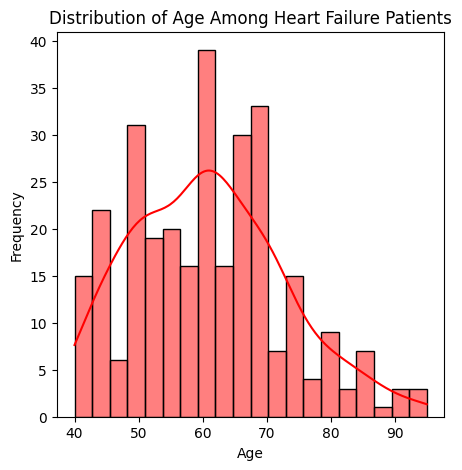

In [39]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,x=df["age"],bins=20,kde=True, color='RED')             
plt.title('Distribution of Age Among Heart Failure Patients')             
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




In [40]:
# here as u see the mean age is about 60 who faces heart desease 
# and also can be seen that older age group is less afective from heart disease 

 # How does the death rate vary with age

In [41]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [42]:
df.DEATH_EVENT.unique()

array([1, 0], dtype=int64)

    age age_group  DEATH_EVENT
0  75.0  (70, 80]            1
1  55.0  (50, 60]            1
2  65.0  (60, 70]            1
3  50.0  (40, 50]            1
4  65.0  (60, 70]            1
age_group
(40, 50]    28.358209
(50, 60]    28.409091
(60, 70]    24.705882
(70, 80]    52.941176
(80, 90]    66.666667
Name: DEATH_EVENT, dtype: float64


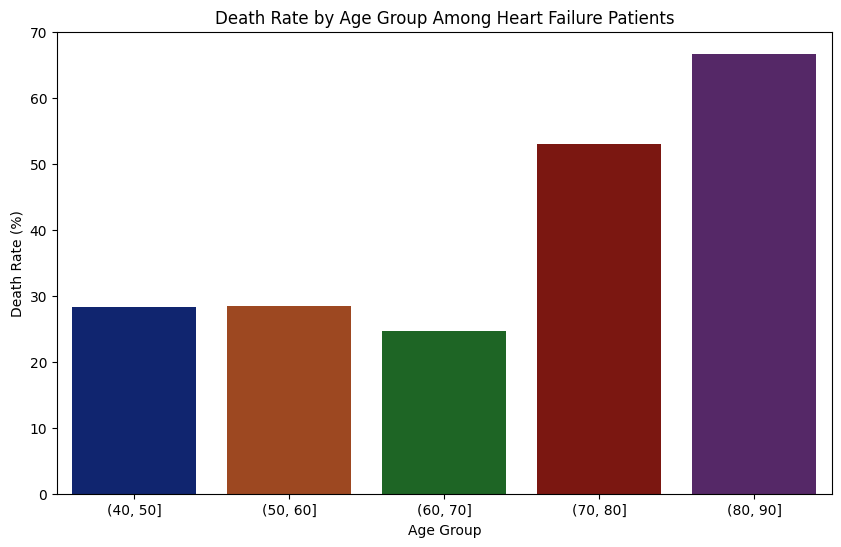

In [43]:

age_bins = [40, 50, 60, 70, 80, 90]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# View the first few rows to ensure the age groups are correct
print(df[['age', 'age_group',"DEATH_EVENT"]].head())



# Calculate death rate by age group
death_rate_by_age = df.groupby('age_group')['DEATH_EVENT'].mean() * 100

# Print the death rate by age group
print(death_rate_by_age)



import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of death rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=death_rate_by_age.index, y=death_rate_by_age.values,palette="dark")
plt.title('Death Rate by Age Group Among Heart Failure Patients')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.show()




In [44]:
# here the minimum death is in 60 to 70 year group and max death is in 80 to 90 group 

# 3 What is the percentage of male and female patients in the dataset?

In [45]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

<Axes: ylabel='proportion'>

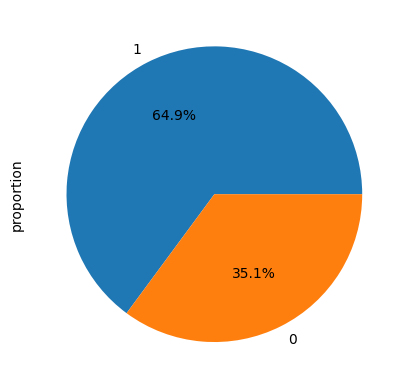

In [46]:
df["sex"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

In [47]:
# as we can see here is about 65 percent of male and 35 % of female       1 for male and 0 for female 

# 4 how does the plateletcount vary with diff age group 

In [48]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

In [49]:
df.platelets

0      265000.00
1      263358.03
2      162000.00
3      210000.00
4      327000.00
         ...    
294    155000.00
295    270000.00
296    742000.00
297    140000.00
298    395000.00
Name: platelets, Length: 299, dtype: float64

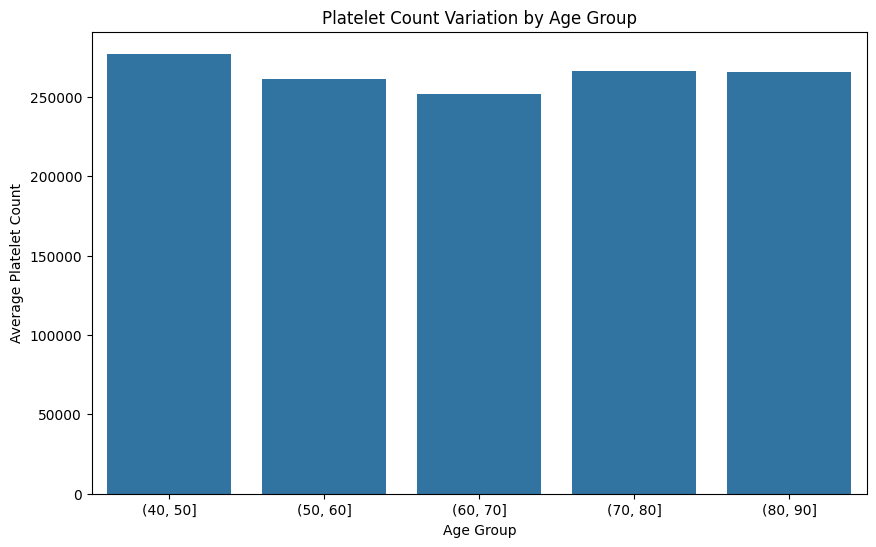

In [50]:


# Assume df is your DataFrame with 'age' and 'platelet_count' columns
age_bins = [40, 50, 60, 70, 80, 90]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# Calculate mean platelet count for each age group
age_group_means = df.groupby('age_group')['platelets'].mean().reset_index()

# Bar plot of platelet count by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='platelets',data=age_group_means )
plt.title("Platelet Count Variation by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Platelet Count")
plt.show()


In [51]:
# insights

# maximum platelets is in 40 to 50 age group which is about 275000 
# and minimum platelets is in the age  geoup of 60 to 70 


# 5  is there a correlation btwn  creatinine and sodium level in the blood 

In [52]:
df .columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

In [53]:
correlation = df['serum_creatinine'].corr(df['serum_sodium'])
print(correlation)


-0.18909521009117392


<Axes: >

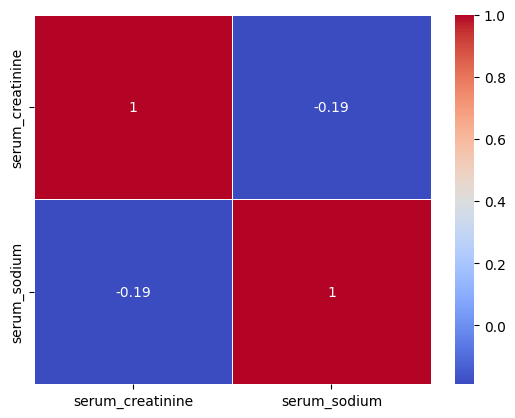

In [54]:

l=df[['serum_creatinine','serum_sodium']]



sns.heatmap(l.corr(), annot = True, cmap = "coolwarm", linewidth = .5)

In [55]:
# there is very minimum rleaton on the negative side between both the serums 




# 6 how does  the preva;ance of high blood pressure differ betwene male and female patient 

In [56]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

In [57]:
df['high_blood_pressure'].isnull().sum()

0

In [58]:
df["sex"].isnull().sum()

0

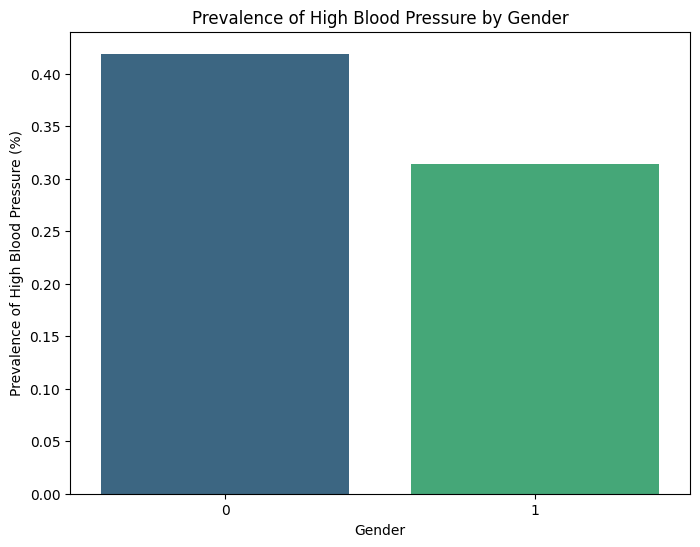

In [59]:
prevalence_by_gender=df.groupby("sex")["high_blood_pressure"].mean().reset_index()


# prevalence_by_gender = prevalence_by_gender.reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='high_blood_pressure', data=prevalence_by_gender, palette='viridis')
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalence of High Blood Pressure (%)')

plt.show()

In [60]:
# insights here we can see that the females have higher bood pressure then the males 

# 7 what is the relation between smoking habits and the occurance of heart faliure 

In [61]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

In [62]:

df["smoking"].isna().sum()


selected_coulmns=["smoking","DEATH_EVENT"]

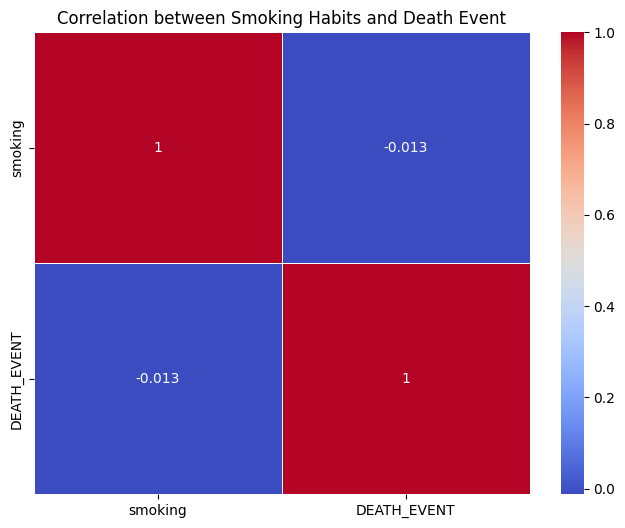

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected columns
selected_columns = ["smoking", "DEATH_EVENT"]

# Calculate the correlation matrix for the selected columns
corr_matrix = df[selected_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between Smoking Habits and Death Event")
plt.show()


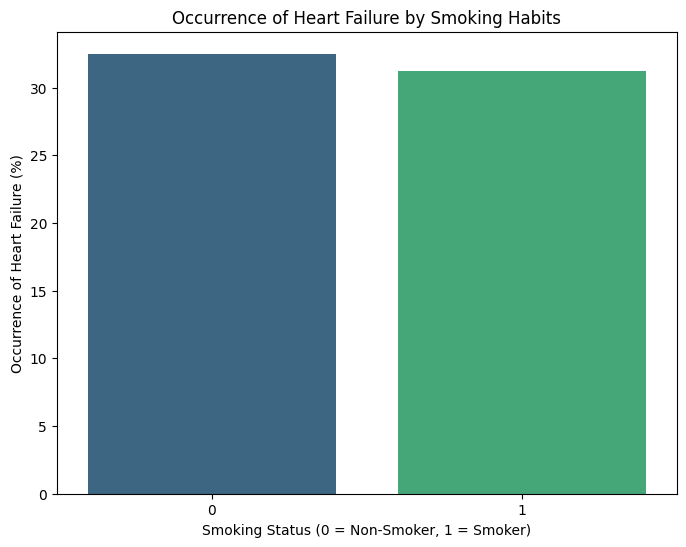

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame with 'smoking' and 'heart_failure' columns

# Calculate the proportion of heart failure by smoking status
proportion_heart_failure = df.groupby('smoking')['DEATH_EVENT'].mean() * 100

# Convert the result to a DataFrame for easy plotting
proportion_heart_failure = proportion_heart_failure.reset_index()

# Bar plot of heart failure occurrence by smoking habits
plt.figure(figsize=(8, 6))
sns.barplot(x='smoking', y='DEATH_EVENT', data=proportion_heart_failure, palette='viridis')
plt.title('Occurrence of Heart Failure by Smoking Habits')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Occurrence of Heart Failure (%)')
plt.show()


In [65]:
# insights there is no much diff betwenn death due to smoking habits 

# 8  are there any noticable paterns  in the distribution of death events accross different age groups 

In [66]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

In [67]:
df.age

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

(array([ 8., 12.,  6., 20., 10., 15.,  7.,  8.,  5.,  5.]),
 array([42. , 47.3, 52.6, 57.9, 63.2, 68.5, 73.8, 79.1, 84.4, 89.7, 95. ]),
 <BarContainer object of 10 artists>)

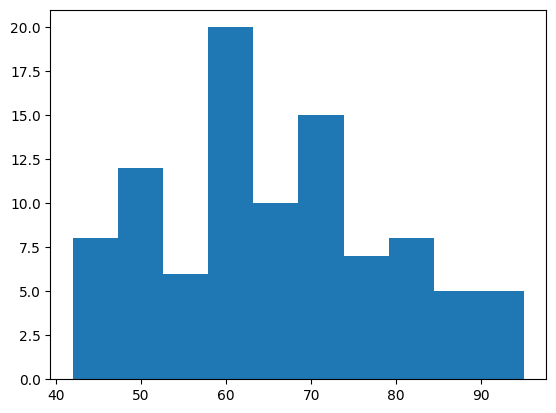

In [68]:
import matplotlib.pyplot as plt

# Filter for death events
death_events = df[df['DEATH_EVENT'] == 1]

# # Plot histogram for ages of death events
# plt.hist(death_events['age'], bins=10, edgecolor='black')
# plt.title('Distribution of Death Events Across Age Groups')
# plt.xlabel('Age')
# plt.ylabel('Number of Death Events')
# plt.show()

plt.hist(death_events['age'])



In [69]:
# insights 

# higest death in age group of 60 to 70 

# lowest death in 80 to 90 age broup 

# 9 is there any significant difference in ejection fraction between patient with and without diabetes


In [70]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

In [71]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,"(70, 80]"
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,"(50, 60]"
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,"(60, 70]"
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,"(40, 50]"
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,"(60, 70]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,"(60, 70]"
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,"(50, 60]"
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,"(40, 50]"
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,"(40, 50]"


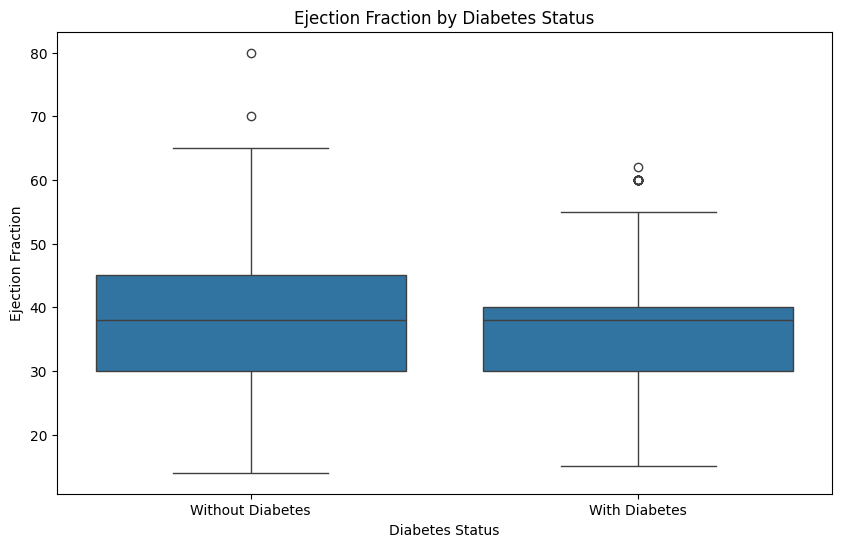

In [72]:

df['Diabetes_Status'] = df['diabetes'].map({1: 'With Diabetes', 0: 'Without Diabetes'})

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_Status', y='ejection_fraction', data=df)
#sns.barplot(x='Diabetes_Status', y='ejection_fraction', data=df)
plt.title('Ejection Fraction by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Ejection Fraction')
plt.show()


 insights


without diabetes fraction is higher in wothout diabetes patient 


both have some outlier 






# 10 how does the serum ceratine level vary between patients who survived and those who did not 

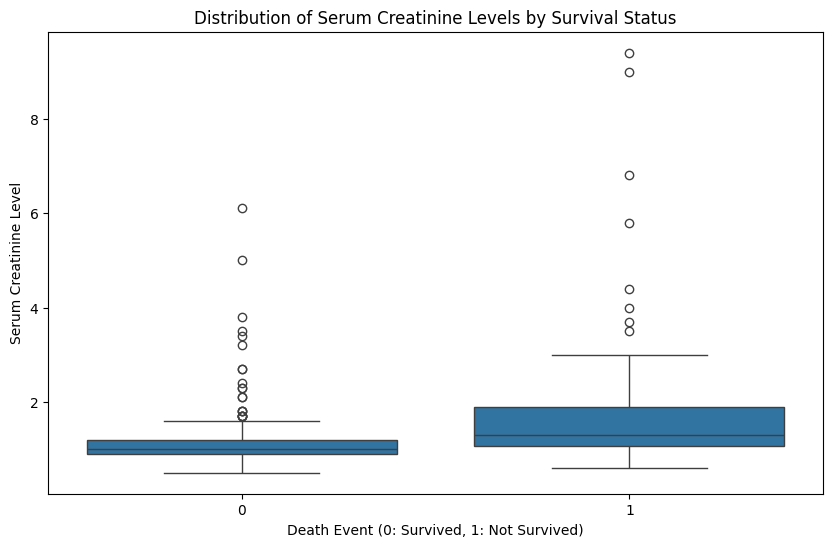

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Create a new DataFrame for patients who survived and those who did not
survived = df[df["DEATH_EVENT"] == 0]
not_survived = df[df["DEATH_EVENT"] == 1]

# Plotting using seaborn for a better visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.xlabel('Death Event (0: Survived, 1: Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.title('Distribution of Serum Creatinine Levels by Survival Status')
plt.show()



 insights 

serum ceratine level is higher who died and in certain cases it was very higher 


serum ceratine level is lower who not  died and in certain cases it was also  higher 
